<a href="https://colab.research.google.com/github/RamosMN/Proyectos/blob/main/Youtube_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esta primera práctica consiste en entender cómo hacer query's a la API de Youtube. El documento está basado en el video de StrataScratch titulado "Working with APIs in Python [For Your Data Science Project]" que se encuentra en el siguiente enlace: https://www.youtube.com/watch?v=fklHBWow8vE

In [1]:
# Importo librerías
import requests
import numpy as np
import pandas as pd
import time
from getpass import getpass # para ocultar key

In [2]:
# Keys
API_KEY = getpass('API KEY:')
Channel_ID = 'UCweCc7bSMX5J4jEH7HFImng' # GMHikaru, un canal de ajedrez popular que me interesa analizar

API KEY:··········


In [96]:
#API CALL
pageToken = ''
url = 'https://www.googleapis.com/youtube/v3/search?key='+API_KEY+'&channelId='+Channel_ID+'&part=snippet,id'+'&order=date&maxResults=1000'+pageToken
Respuesta = requests.get(url).json()


In [98]:
len(Respuesta['items'])

50

In [99]:
# Respuesta   # los datos están en la key 'items'

Ides = []
Fecha = []

for video in Respuesta['items']:
  if video['id']['kind'] == 'youtube#video':

    Id = video['id']['videoId']
    Date = video['snippet']['publishTime']
    Date = Date.split('T')[0]

    Ides.append(Id)
    Fecha.append(Date)

In [100]:
df_fechas =  pd.DataFrame(columns = ['Fecha'])
for f in Fecha:
  df_fechas = df_fechas.append({'Fecha' : f}, ignore_index=True)

In [101]:
np.shape(Ides), np.shape(Respuesta['items'])

((49,), (50,))

In [102]:
#Segunda API CALL
pageToken = ''

for Ids in Ides:
  url = 'https://www.googleapis.com/youtube/v3/videos?key='+API_KEY+'&id='+Ids+'&maxResults=100'+'&part=snippet, statistics'+pageToken
  Respuesta2 = requests.get(url).json()

In [103]:
view = Respuesta2['items'][0]['statistics']['viewCount']
like = Respuesta2['items'][0]['statistics']['likeCount']
fav = Respuesta2['items'][0]['statistics']['favoriteCount']
comm = Respuesta2['items'][0]['statistics']['commentCount']
print(view, like, fav, comm)

258877 5283 0 1512


Por cada video quiero guardar esa info en una tabla, para eso se crea un dataframe en pandas vacío con el nombre de las columnas correspondiente

In [104]:
df = pd.DataFrame(columns = ['Vistas', 'Likes', 'Favoritos', 'Comentarios'])
df

,Vistas,Likes,Favoritos,Comentarios


In [105]:
# Realizo el loop y agrego la info al dataframe
A = []
for Ids in Ides:
  url = 'https://www.googleapis.com/youtube/v3/videos?key='+API_KEY+'&id='+Ids+'&maxResults=100'+'&part=snippet, statistics'+pageToken
  Respuesta2 = requests.get(url).json()

  view = Respuesta2['items'][0]['statistics']['viewCount']
  like = Respuesta2['items'][0]['statistics']['likeCount']
  fav = Respuesta2['items'][0]['statistics']['favoriteCount']
  comm = Respuesta2['items'][0]['statistics']['commentCount']

  # https://stackoverflow.com/questions/53924656/df-append-is-not-appending-to-the-dataframe
  df = df.append({'Vistas' : view, 'Likes' : like, 'Favoritos' : fav, 'Comentarios' : comm}, ignore_index=True)

In [106]:
len(df_fechas), len(df)

(49, 49)

In [ ]:
videos = Respuesta2['items']
views, likes, favs, comms = [], [], [], []
for video in videos:
  views.append( video['statistics']['viewCount'] )
  likes.append( video['statistics']['likeCount'] )
  favs.append( video['statistics']['favoriteCount'] )
  comms.append( video['statistics']['commentCount'] )

In [108]:
# https://stackoverflow.com/questions/38256750/make-a-scatter-plot-in-matplotlib-with-dates-on-x-axis-and-values-on-y
dates = [pd.to_datetime(f) for f in Fecha]

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt

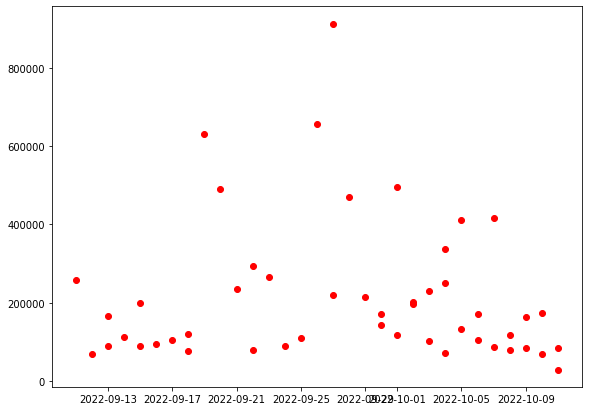

In [109]:
fig, ax = plt.subplots(1, 1, figsize = (9.5, 7))
vist = df['Vistas'].values.astype(float)
ax.plot_date(dates, vist, c = 'red')
# ax.set_yticks([2000, 300000])
# ax.set_yscale('log')

In [110]:
dates

[Timestamp('2022-10-11 00:00:00'),
 Timestamp('2022-10-11 00:00:00'),
 Timestamp('2022-10-10 00:00:00'),
 Timestamp('2022-10-10 00:00:00'),
 Timestamp('2022-10-09 00:00:00'),
 Timestamp('2022-10-09 00:00:00'),
 Timestamp('2022-10-08 00:00:00'),
 Timestamp('2022-10-08 00:00:00'),
 Timestamp('2022-10-07 00:00:00'),
 Timestamp('2022-10-07 00:00:00'),
 Timestamp('2022-10-06 00:00:00'),
 Timestamp('2022-10-06 00:00:00'),
 Timestamp('2022-10-05 00:00:00'),
 Timestamp('2022-10-05 00:00:00'),
 Timestamp('2022-10-04 00:00:00'),
 Timestamp('2022-10-04 00:00:00'),
 Timestamp('2022-10-04 00:00:00'),
 Timestamp('2022-10-03 00:00:00'),
 Timestamp('2022-10-03 00:00:00'),
 Timestamp('2022-10-02 00:00:00'),
 Timestamp('2022-10-02 00:00:00'),
 Timestamp('2022-10-01 00:00:00'),
 Timestamp('2022-10-01 00:00:00'),
 Timestamp('2022-09-30 00:00:00'),
 Timestamp('2022-09-30 00:00:00'),
 Timestamp('2022-09-29 00:00:00'),
 Timestamp('2022-09-28 00:00:00'),
 Timestamp('2022-09-27 00:00:00'),
 Timestamp('2022-09-